In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'
pd.set_option('display.max_rows', 500)

# 1450 Broadway

In [380]:
path="1450 Boradway Timesheets - 03212019.xlsx"
path1="1450 Broadway FieldLens.csv"
dataTX = pd.read_excel(path)
dataFL = pd.read_csv(path1,index_col=3, parse_dates=True)

In [110]:
dataFL = dataFL.sort_index()
dataFL = dataFL.loc['2019-02-01':]
dataFL_DT = dataFL[["num_of_workers","name"]]

In [111]:
dailyFL = dataFL.groupby(["date"]).sum()
dailyFL = dailyFL[["num_of_workers"]]

In [226]:
dataTX=dataTX.replace({0: None})
dailyTX = dataTX.count()
dailyTX = pd.DataFrame(dailyTX,columns=["headcount"])[5:]

## Daily total headcount comparison

In [373]:
daily = dailyTX.join(dailyFL, how='outer')
daily.index = pd.to_datetime(daily.index).date

daily = daily[["num_of_workers","headcount"]]
daily = daily.rename(index=str, columns={"num_of_workers": "FL_headcount","headcount":"Triax_headcount"})
daily["difference"] = daily["FL_headcount"] - daily["Triax_headcount"]
daily

,FL_headcount,Triax_headcount,difference
2019-02-01,4.0,1,3.0
2019-02-02,NaN,0,NaN
2019-02-03,NaN,0,NaN
2019-02-04,6.0,1,5.0
2019-02-05,18.0,1,17.0
2019-02-06,19.0,2,17.0
2019-02-07,18.0,2,16.0
2019-02-08,18.0,18,0.0
2019-02-09,NaN,0,NaN
2019-02-10,NaN,0,NaN


In [114]:
daily.to_csv("1450 Broadway Triax vs FieldLens.csv")

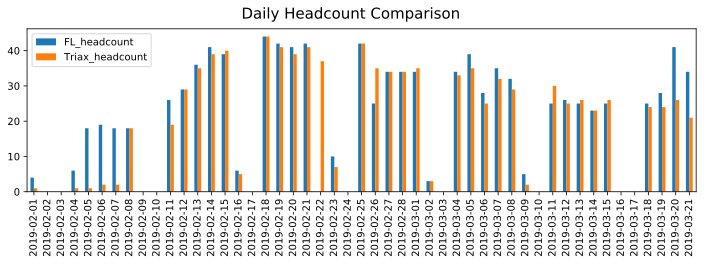

In [370]:
daily[["FL_headcount","Triax_headcount"]].plot.bar(figsize=(12,3))
plt.suptitle('Daily Headcount Comparison', fontsize=15)
plt.show()

Text(0.5, 0.98, 'Daily Headcount Difference Distribution')

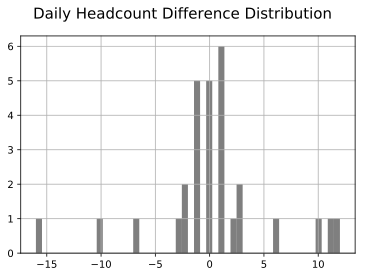

In [371]:
daily["difference"].diff().hist(color='k', alpha=0.5, bins=50)
plt.suptitle('Daily Headcount Difference Distribution', fontsize=15)

In [160]:
dataTX_DT = dataTX.groupby(["Subcontractor"]).count()
dataTX_DT = dataTX_DT.T[4:]
dataTX_DT = pd.melt(dataTX_DT.reset_index(), id_vars='index')
dataTX_DT = dataTX_DT[dataTX_DT['value'] > 0]
dataTX_DT = dataTX_DT.rename(index=str, columns={"index": "date", "Subcontractor": "name", "value": "TX_headcount"})

In [379]:
pd.DataFrame(dataTX_DT.name.unique())

In [378]:
pd.DataFrame(dataFL_DT.name.unique())

In [215]:
dataTX_DT = dataTX_DT.replace({"Contact Electric":"Contact Electric Corp.", "Mitie Plumbing and Heating Corp": "Mitie Plumbing & Heating Corp.", "Interstate  Air": "Interstate Air" })

## Daily headcount by sub comparison

In [216]:
dataTX_Daily = dataTX_DT.set_index('date').sort_index()
dataTX_Daily = dataTX_Daily.set_index('name', append=True)

dataFL_Daily = dataFL_DT.set_index('name', append=True)

In [244]:
compare_daily = dataTX_Daily.join(dataFL_Daily, how='outer')
compare_daily = compare_daily.groupby(level=['date','name']).sum()
compare_daily = compare_daily.rename({'num_of_workers': 'FL_headcount'}, axis='index')

compare_daily['difference'] = compare_daily['TX_headcount'] - compare_daily['num_of_workers'] 
compare_daily

TX_headcount  num_of_workers  \
date       name                                                           
2019-02-01 Pentagon Electric                        0.0             3.0   
           Premier Sanitation                       0.0             1.0   
           Triax Technologies                       1.0             0.0   
2019-02-04 City Carpentry                           0.0             3.0   
           Elite Glass                              0.0             2.0   
           Premier Sanitation                       1.0             1.0   
2019-02-05 City Carpentry                           0.0             3.0   
           Elite Glass                              0.0             2.0   
           Interstate Air                           0.0             1.0   
           Mitie Plumbing & Heating Corp.           0.0            11.0   
           Premier Sanitation                       1.0             1.0   
2019-02-06 City Carpentry                           1.0             3.0   
           Elite Glass                              0.0             2.0   
           Interstate Air                           0.0             1.0   
           Mitie Plumbing & Heating Corp.           0.0            11.0   
           Premier Sanitation                       2.0             2.0   
2019-02-07 City Carpentry                           1.0             3.0   
           Interstate Air                           0.0             2.0   
           Mitie Plumbing & Heating Corp.           0.0            12.0   
           Premier Sanitation                       1.0             1.0   
2019-02-08 City Carpentry                           4.0             4.0   
           Interstate Air                           3.0             3.0   
           Mitie Plumbing & Heating Corp.          10.0            10.0   
           Premier Sanitation                       1.0             1.0   
2019-02-11 City Carpentry                           8.0             7.0   
           Interstate Air                           2.0             3.0   
           Mitie Plumbing & Heating Corp.           8.0            15.0   
           Premier Sanitation                       1.0             1.0   
2019-02-12 City Carpentry                           7.0             7.0   
           Interstate Air                           5.0             5.0   
           Mitie Plumbing & Heating Corp.          16.0            16.0   
           Premier Sanitation                       1.0             1.0   
2019-02-13 City Carpentry                           8.0             8.0   
           Interstate Air                          11.0            11.0   
           Mitie Plumbing & Heating Corp.          15.0            16.0   
           Premier Sanitation                       1.0             1.0   
2019-02-14 City Carpentry                           8.0             8.0   
           Interior Mogul                           0.0             3.0   
           Interstate Air                          12.0            12.0   
           Mitie Plumbing & Heating Corp.          18.0            17.0   
           Premier Sanitation                       1.0             1.0   
2019-02-15 City Carpentry                           8.0             7.0   
           Interstate Air                          12.0            12.0   
           Mitie Plumbing & Heating Corp.          19.0            19.0   
           Premier Sanitation                       1.0             1.0   
2019-02-16 Mitie Plumbing & Heating Corp.           4.0             5.0   
           Premier Sanitation                       1.0             1.0   
2019-02-18 City Carpentry                           5.0             4.0   
           Elite Glass                              9.0             9.0   
           Interstate Air                          12.0            12.0   
           Mitie Plumbing & Heating Corp.          17.0            18.0   
           Premier Sanitation                       1.0             

In [233]:
compare_daily.to_csv("1450 Broadway Triax vs FieldLens by sub.csv")

In [280]:
compare_sub = compare_daily[['difference']]
compare_sub = compare_sub.reset_index()

In [287]:
compare_sub = compare_sub.pivot(index= 'date', columns='name', values= 'difference')

Text(0.5, 0.98, 'Daily Headcount Difference Distribution by Subcontractor')

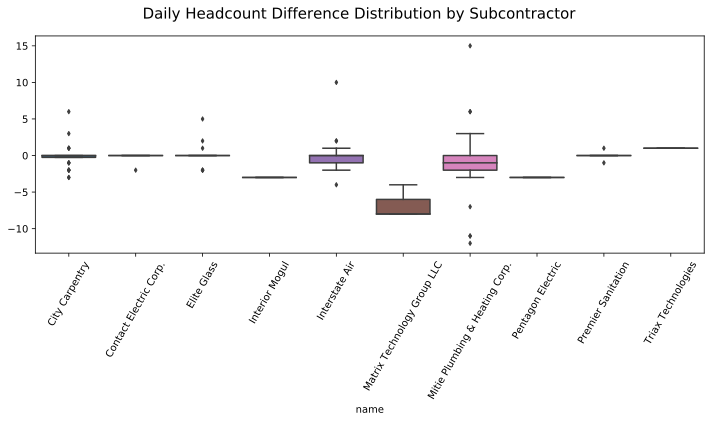

In [377]:
plt.figure(figsize=(12, 4))
sns.boxplot(data = compare_sub,fliersize = 3)
plt.xticks(rotation=60)
plt.suptitle('Daily Headcount Difference Distribution by Subcontractor', fontsize=15)

**Brief Conclusions**  

All records are consistent:
 - Interior Mogul
 - Pentagon Electric
 - Triax Tech
 
Most records are consistent:
- City Carpentry 
- Contact Electric Corp
- Elite Class,
- Premier Sanitation

Several inconsistent records: 
- Interstate Air
- Matrix Tech Group
- Mitie Plumbing & Heating